In [1]:
!pip install pycaret
from pycaret.datasets import get_data
from pycaret.clustering import *
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
data  = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.drop(columns=['species'])

In [4]:
clustering_setup = setup(data)

,Description,Value
0,Session id,682
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
preprocessing_techniques = {
    'None': None,
    'normalize': StandardScaler(),
    'pca': PCA(),
    'transform': None,
    'scale': MinMaxScaler()
}

In [6]:
num_clusters = [3, 4, 5]

In [18]:
clustering_algorithms = ['kmeans', 'hclust', 'dbscan', 'sc' , 'optics','meanshift','ap']

In [19]:
results_dict = {}

In [20]:
for algorithm in clustering_algorithms:
    algorithm_results = pd.DataFrame(index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
    for technique, preprocess_method in preprocessing_techniques.items():

        if preprocess_method is not None:
            preprocessed_data = preprocess_method.fit_transform(data)
        else:
            preprocessed_data = data


        model = create_model(algorithm)


        model.fit(preprocessed_data)


        if algorithm in ['dbscan', 'hclust','sc','optics']:
            labels = model.labels_
        else:
            labels = model.predict(preprocessed_data)


        if len(set(labels)) <= 1:
            continue


        silhouette = silhouette_score(preprocessed_data, labels)
        calinski_harabasz = calinski_harabasz_score(preprocessed_data, labels)
        davies_bouldin = davies_bouldin_score(preprocessed_data, labels)


        col_name = f'{technique}_c='
        for n in num_clusters:
            col_name_n = col_name + str(n)
            algorithm_results[col_name_n] = [silhouette, calinski_harabasz, davies_bouldin]


    results_dict[algorithm] = algorithm_results

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
for algorithm, results in results_dict.items():
    results.to_csv(f'{algorithm}_results.csv')

In [22]:
hclust_result=pd.read_csv('/content/hclust_results.csv')

In [23]:
hclust_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5,scale_c=3,scale_c=4,scale_c=5
0,Silhouette,0.488740,0.488740,0.488740,0.399326,0.399326,0.399326,0.488740,0.488740,0.488740,0.488740,0.488740,0.488740,0.432557,0.432557,0.432557
1,Calinski-Harabasz,513.772164,513.772164,513.772164,198.730315,198.730315,198.730315,513.772164,513.772164,513.772164,513.772164,513.772164,513.772164,299.899189,299.899189,299.899189
2,Davies-Bouldin,0.795602,0.795602,0.795602,0.981081,0.981081,0.981081,0.795602,0.795602,0.795602,0.795602,0.795602,0.795602,0.849343,0.849343,0.849343


In [24]:
dbscan_result=pd.read_csv('/content/dbscan_results.csv')

In [25]:
dbscan_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5
0,Silhouette,0.485842,0.485842,0.485842,0.349198,0.349198,0.349198,0.485842,0.485842,0.485842,0.485842,0.485842,0.485842
1,Calinski-Harabasz,219.870227,219.870227,219.870227,76.975884,76.975884,76.975884,219.870227,219.870227,219.870227,219.870227,219.870227,219.870227
2,Davies-Bouldin,7.222827,7.222827,7.222827,6.160798,6.160798,6.160798,7.222827,7.222827,7.222827,7.222827,7.222827,7.222827


In [26]:
kmeans_result=pd.read_csv('/content/kmeans_results.csv')

In [27]:
kmeans_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5,scale_c=3,scale_c=4,scale_c=5
0,Silhouette,0.497826,0.497826,0.497826,0.390482,0.390482,0.390482,0.497826,0.497826,0.497826,0.497826,0.497826,0.497826,0.444627,0.444627,0.444627
1,Calinski-Harabasz,529.398294,529.398294,529.398294,206.098162,206.098162,206.098162,529.398294,529.398294,529.398294,529.398294,529.398294,529.398294,313.183841,313.183841,313.183841
2,Davies-Bouldin,0.780640,0.780640,0.780640,0.865051,0.865051,0.865051,0.780640,0.780640,0.780640,0.780640,0.780640,0.780640,0.901127,0.901127,0.901127


In [28]:
sc_result=pd.read_csv('/content/sc_results.csv')

In [29]:
sc_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5,scale_c=3,scale_c=4,scale_c=5
0,Silhouette,0.491423,0.491423,0.491423,0.075262,0.075262,0.075262,0.491423,0.491423,0.491423,0.491423,0.491423,0.491423,0.398204,0.398204,0.398204
1,Calinski-Harabasz,466.630887,466.630887,466.630887,20.216215,20.216215,20.216215,466.630887,466.630887,466.630887,466.630887,466.630887,466.630887,268.701396,268.701396,268.701396
2,Davies-Bouldin,0.658227,0.658227,0.658227,1.594733,1.594733,1.594733,0.658227,0.658227,0.658227,0.658227,0.658227,0.658227,0.855919,0.855919,0.855919


In [30]:
optics_result=pd.read_csv('/content/optics_results.csv')

In [31]:
optics_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5,scale_c=3,scale_c=4,scale_c=5
0,Silhouette,-0.098701,-0.098701,-0.098701,-0.300675,-0.300675,-0.300675,-0.098701,-0.098701,-0.098701,-0.098701,-0.098701,-0.098701,-0.219735,-0.219735,-0.219735
1,Calinski-Harabasz,23.004159,23.004159,23.004159,8.539353,8.539353,8.539353,23.004159,23.004159,23.004159,23.004159,23.004159,23.004159,16.398008,16.398008,16.398008
2,Davies-Bouldin,2.145694,2.145694,2.145694,2.503841,2.503841,2.503841,2.145694,2.145694,2.145694,2.145694,2.145694,2.145694,3.181224,3.181224,3.181224


In [32]:
meanshift_result=pd.read_csv('/content/meanshift_results.csv')

In [33]:
meanshift_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5,scale_c=3,scale_c=4,scale_c=5
0,Silhouette,0.685482,0.685482,0.685482,0.580184,0.580184,0.580184,0.685482,0.685482,0.685482,0.685482,0.685482,0.685482,0.629468,0.629468,0.629468
1,Calinski-Harabasz,508.882183,508.882183,508.882183,248.903428,248.903428,248.903428,508.882183,508.882183,508.882183,508.882183,508.882183,508.882183,353.367403,353.367403,353.367403
2,Davies-Bouldin,0.389291,0.389291,0.389291,0.597555,0.597555,0.597555,0.389291,0.389291,0.389291,0.389291,0.389291,0.389291,0.487705,0.487705,0.487705


In [34]:
ap_result=pd.read_csv('/content/ap_results.csv')

In [35]:
ap_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,normalize_c=3,normalize_c=4,normalize_c=5,pca_c=3,pca_c=4,pca_c=5,transform_c=3,transform_c=4,transform_c=5,scale_c=3,scale_c=4,scale_c=5
0,Silhouette,0.351558,0.351558,0.351558,0.343417,0.343417,0.343417,0.351558,0.351558,0.351558,0.351558,0.351558,0.351558,0.319689,0.319689,0.319689
1,Calinski-Harabasz,445.081105,445.081105,445.081105,176.994902,176.994902,176.994902,445.081105,445.081105,445.081105,445.081105,445.081105,445.081105,234.711555,234.711555,234.711555
2,Davies-Bouldin,0.980631,0.980631,0.980631,0.904089,0.904089,0.904089,0.980631,0.980631,0.980631,0.980631,0.980631,0.980631,1.042710,1.042710,1.042710


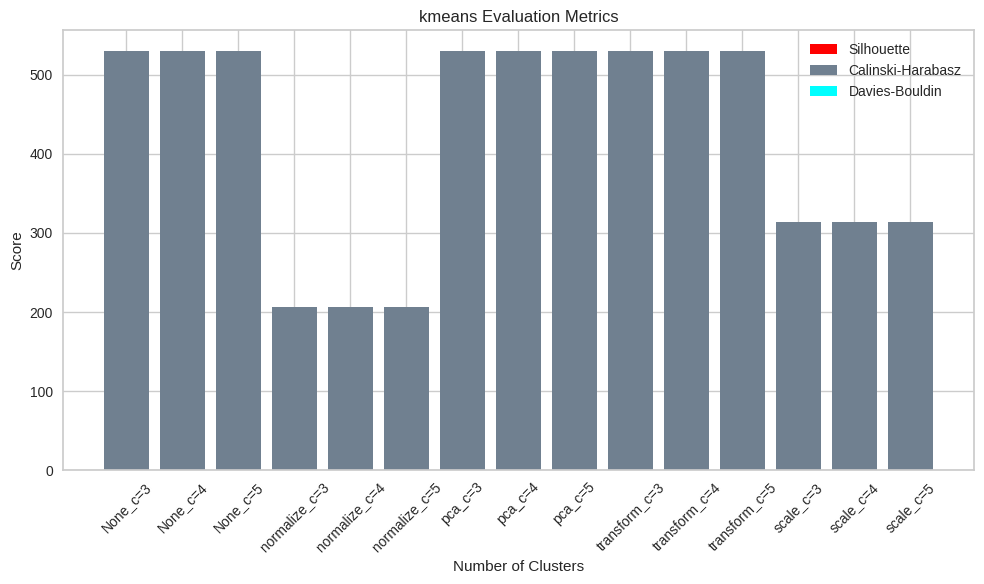

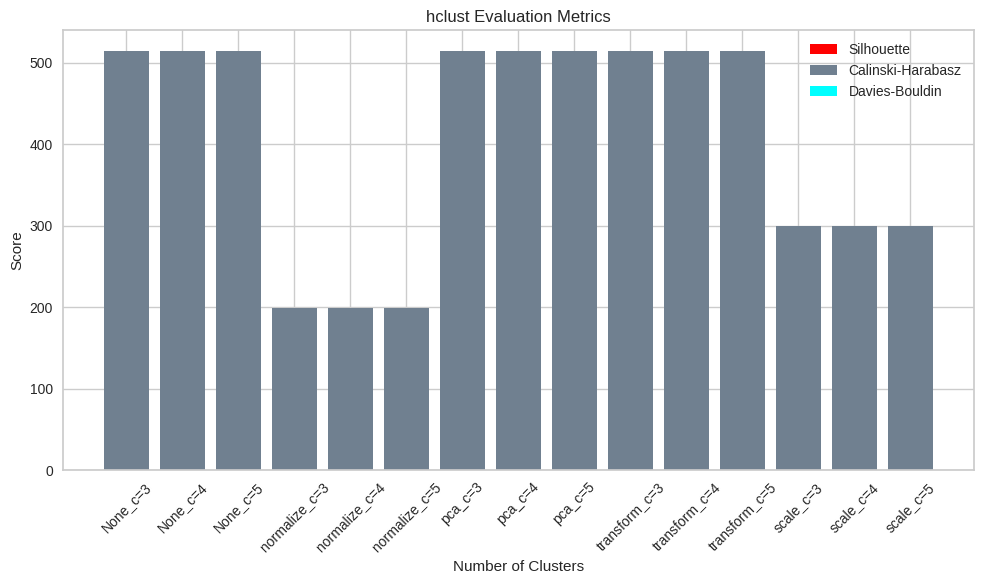

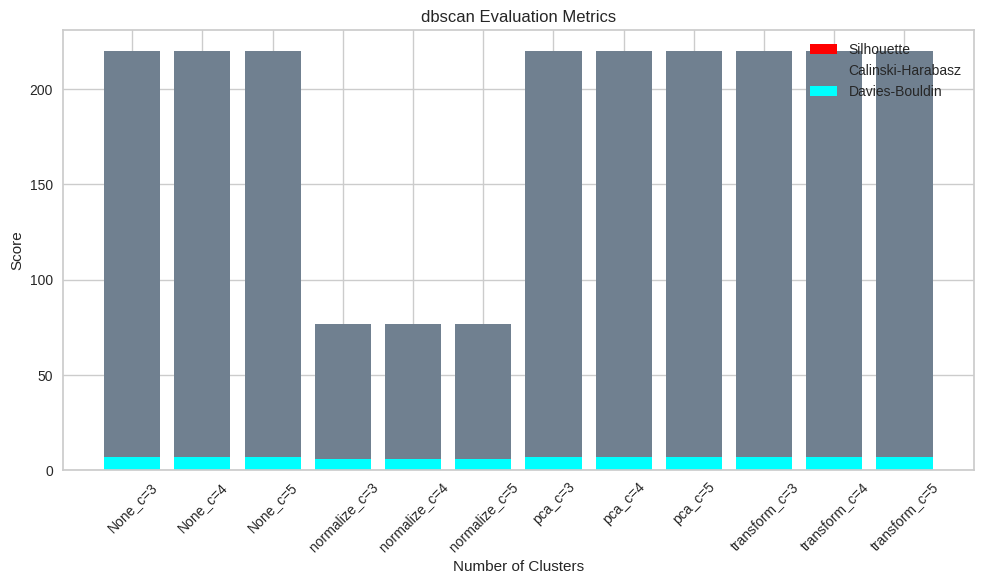

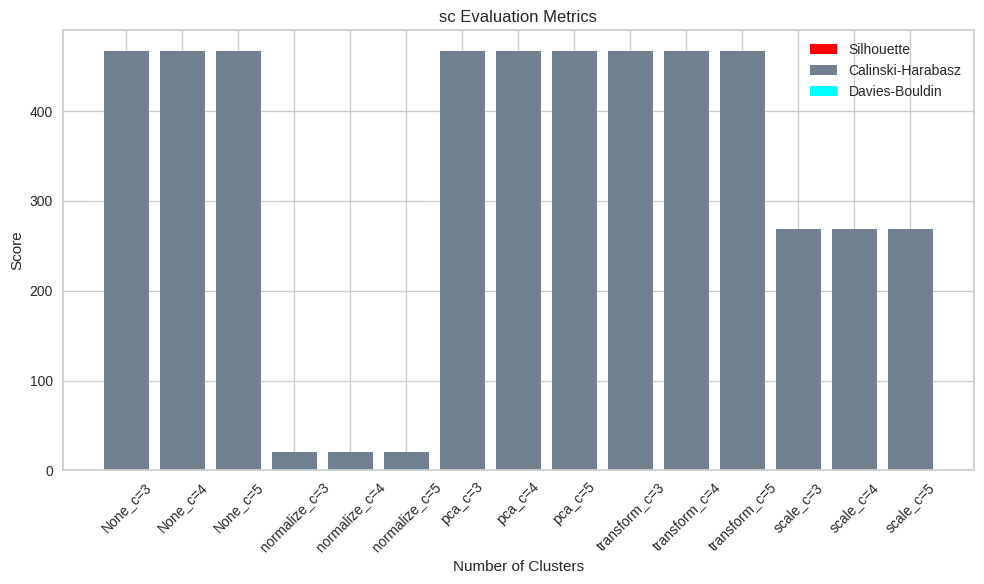

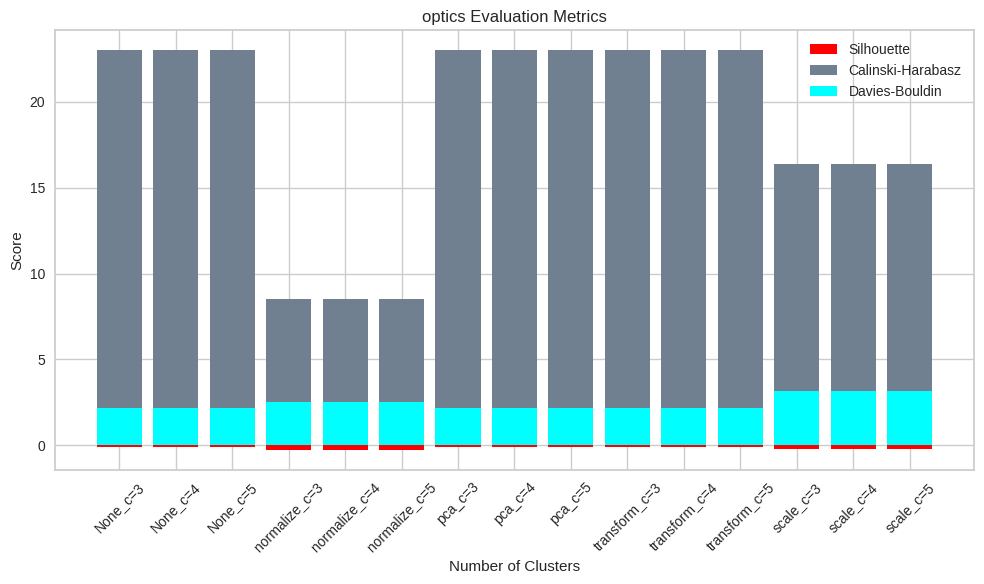

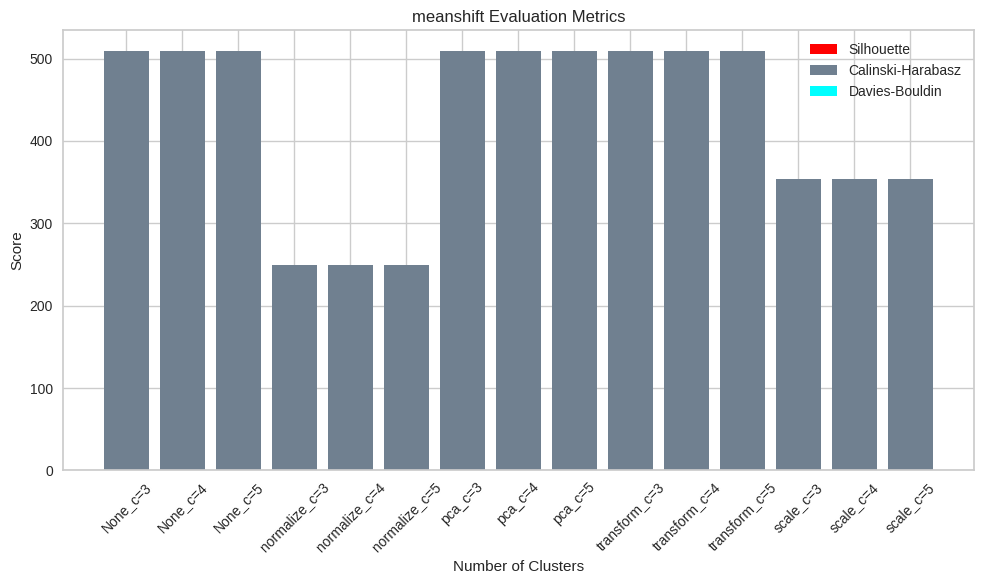

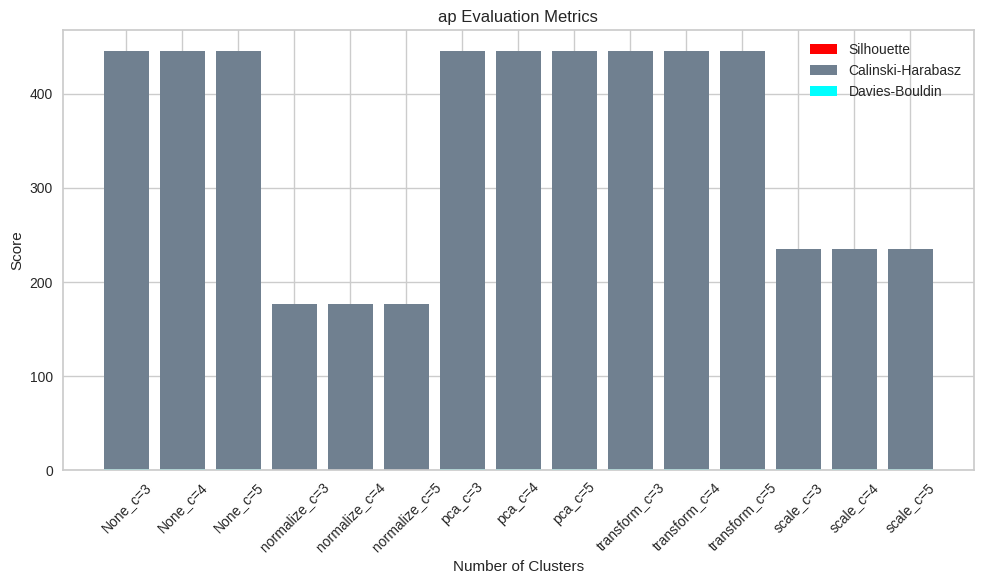

In [45]:
import matplotlib.pyplot as plt

evaluation_metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
colors = ['red', 'slategray', 'cyan']  # Define colors for each metric

for algorithm, results in results_dict.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'{algorithm} Evaluation Metrics')
    for i, metric in enumerate(evaluation_metrics):
        plt.bar(results.columns, results.loc[metric], label=metric, color=colors[i])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
